In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from sqlalchemy import create_engine
from scipy.stats.mstats import winsorize

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, 
                                                            postgres_host, postgres_port, postgres_db))
data = pd.read_sql_query('select * from houseprices', con=engine)
engine.dispose()

In [46]:
print(data.columns)
# data.head()
# data.info()

Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street',
       'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig',
       'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype',
       'housestyle', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd',
       'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype',
       'masvnrarea', 'exterqual', 'extercond', 'foundation', 'bsmtqual',
       'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1',
       'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating',
       'heatingqc', 'centralair', 'electrical', 'firstflrsf', 'secondflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal',
       'garagecond', 'paved

In [95]:
df = data[['saleprice', 'overallcond', 'grlivarea']]
df1 = pd.get_dummies(data['neighborhood'], drop_first=True).iloc[:, 1:]

df_final = pd.concat([df, df1], axis=1)
df_final.head()

,saleprice,overallcond,grlivarea,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,208500,5,1710,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,181500,8,1262,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,223500,5,1786,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,140000,5,1717,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,250000,5,2198,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


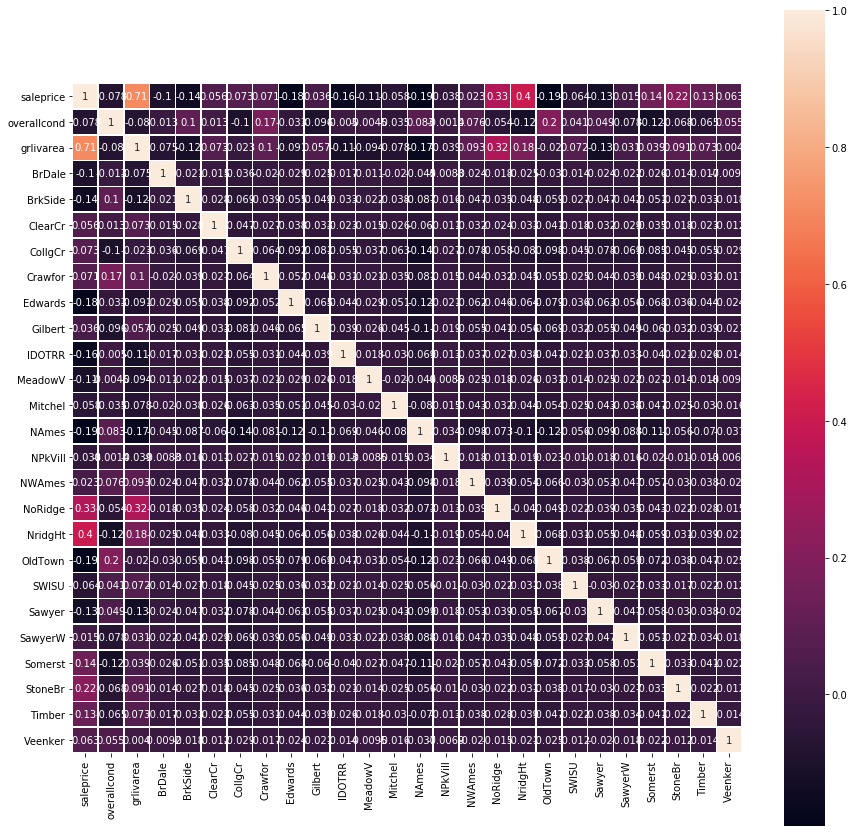

In [100]:
corr = df_final.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, square=True, annot=True, linewidths=.5
            

In [117]:
df_final.corr()

,saleprice,overallcond,grlivarea,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
saleprice,1.000000,-0.077856,0.708624,-0.101303,-0.143648,0.055718,0.072626,0.071160,-0.179949,0.035940,...,0.330424,0.402149,-0.192189,-0.063705,-0.128394,0.014560,0.140058,0.215363,0.126236,0.063471
overallcond,-0.077856,1.000000,-0.079686,-0.013043,0.102864,0.012976,-0.102007,0.173231,-0.032991,-0.096486,...,-0.054372,-0.122037,0.202733,0.040894,0.048910,-0.077996,-0.121549,-0.068266,-0.065212,0.054622
grlivarea,0.708624,-0.079686,1.000000,-0.074599,-0.120958,0.072576,-0.022523,0.100013,-0.090555,0.057302,...,0.321450,0.179892,-0.019705,0.071806,-0.132106,0.031078,0.038667,0.091365,0.072790,0.004009
BrDale,-0.101303,-0.013043,-0.074599,1.000000,-0.021410,-0.014719,-0.035619,-0.020027,-0.028543,-0.025176,...,-0.017893,-0.024838,-0.030488,-0.013894,-0.024323,-0.021601,-0.026335,-0.013894,-0.017208,-0.009171
BrkSide,-0.143648,0.102864,-0.120958,-0.021410,1.000000,-0.028441,-0.068826,-0.038696,-0.055153,-0.048647,...,-0.034573,-0.047993,-0.058911,-0.026846,-0.046997,-0.041739,-0.050886,-0.026846,-0.033249,-0.017722
ClearCr,0.055718,0.012976,0.072576,-0.014719,-0.028441,1.000000,-0.047317,-0.026603,-0.037917,-0.033444,...,-0.023769,-0.032995,-0.040501,-0.018457,-0.032310,-0.028696,-0.034984,-0.018457,-0.022859,-0.012183
CollgCr,0.072626,-0.102007,-0.022523,-0.035619,-0.068826,-0.047317,1.000000,-0.064378,-0.091757,-0.080933,...,-0.057519,-0.079844,-0.098009,-0.044664,-0.078189,-0.069441,-0.084658,-0.044664,-0.055316,-0.029483
Crawfor,0.071160,0.173231,0.100013,-0.020027,-0.038696,-0.026603,-0.064378,1.000000,-0.051589,-0.045504,...,-0.032339,-0.044891,-0.055104,-0.025112,-0.043961,-0.039042,-0.047598,-0.025112,-0.031101,-0.016576
Edwards,-0.179949,-0.032991,-0.090555,-0.028543,-0.055153,-0.037917,-0.091757,-0.051589,1.000000,-0.064856,...,-0.046093,-0.063983,-0.078539,-0.035791,-0.062656,-0.055646,-0.067840,-0.035791,-0.044327,-0.023626
Gilbert,0.035940,-0.096486,0.057302,-0.025176,-0.048647,-0.033444,-0.080933,-0.045504,-0.064856,1.000000,...,-0.040655,-0.056435,-0.069274,-0.031569,-0.055265,-0.049082,-0.059837,-0.031569,-0.039098,-0.020839


In [103]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings('ignore')

df_final.columns

Index(['saleprice', 'overallcond', 'grlivarea', 'BrDale', 'BrkSide', 'ClearCr',
       'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV',
       'Mitchel', 'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt',
       'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber',
       'Veenker'],
      dtype='object')

In [115]:
target = df_final['saleprice']
features = df_final[['overallcond', 'grlivarea', 'BrDale', 'BrkSide', 'ClearCr',
       'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV',
       'Mitchel', 'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt',
       'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber',
       'Veenker']]

lrm = linear_model.LinearRegression()
lrm.fit(features, target)
print(lrm.coef_)
print(lrm.intercept_)

[ 7.88803638e+03  7.85742463e+01 -6.48776159e+04 -5.47674807e+04
 -9.38159239e+03  3.64821915e+03 -1.87728220e+04 -5.66389228e+04
 -1.32044365e+04 -6.99904227e+04 -6.49003073e+04 -2.44138877e+04
 -3.94451950e+04 -3.62365824e+04 -3.02600764e+04  6.03372578e+04
  8.96311955e+04 -7.48185433e+04 -8.22919627e+04 -4.11761513e+04
 -1.60699716e+04  2.35537576e+04  8.67564515e+04  2.76589889e+04
  3.16623876e+04]
36655.07196287412


In [116]:
import statsmodels.api as sm

# We need to manually add a constant
# in statsmodels' sm
features = sm.add_constant(features)

results = sm.OLS(target, features).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     170.4
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        12:54:46   Log-Likelihood:                -17537.
No. Observations:                1460   AIC:                         3.513e+04
Df Residuals:                    1434   BIC:                         3.526e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.666e+04   1.12e+04      3.274      0.001    1.47e+04    5.86e+04
overallcond  7888.0364   1035.069      7.621      0.000    5857.624    9918.449
grlivarea      78.5742      2.355     33.365      0.000      73.955      83.194
BrDale      -6.488e+04   1.37e+04     -4.748      0.000   -9.17e+04   -3.81e+04
BrkSide     -5.477e+04   1.07e+04     -5.121      0.000   -7.57e+04   -3.38e+04
ClearCr     -9381.5924    1.2e+04     -0.782      0.434   -3.29e+04    1.42e+04
CollgCr      3648.2191   9794.830      0.372      0.710   -1.56e+04    2.29e+04
Crawfor     -1.877e+04    1.1e+04     -1.714      0.087   -4.03e+04    2717.004
Edwards     -5.664e+04   1.01e+04     -5.623      0.000   -7.64e+04   -3.69e+04
Gilbert      -1.32e+04   1.03e+04     -1.283      0.200   -3.34e+04    6977.667
IDOTRR      -6.999e+04   1.14e+04     -6.151      0.000   -9.23e+04   -4.77e+04
MeadowV      -6.49e+04   1.35e+04     -4.822      0.000   -9.13e+04   -3.85e+04
Mitchel     -2.441e+04   1.09e+04     -2.245      0.025   -4.57e+04   -3079.403
NAmes       -3.945e+04   9636.959     -4.093      0.000   -5.83e+04   -2.05e+04
NPkVill     -3.624e+04   1.63e+04     -2.225      0.026   -6.82e+04   -4292.733
NWAmes      -3.026e+04   1.04e+04     -2.904      0.004   -5.07e+04   -9819.874
NoRidge      6.034e+04   1.15e+04      5.269      0.000    3.79e+04    8.28e+04
NridgHt      8.963e+04   1.04e+04      8.646      0.000    6.93e+04     1.1e+05
OldTown     -7.482e+04   1.01e+04     -7.440      0.000   -9.45e+04   -5.51e+04
SWISU       -8.229e+04   1.23e+04     -6.689      0.000   -1.06e+05   -5.82e+04
Sawyer      -4.118e+04   1.04e+04     -3.967      0.000   -6.15e+04   -2.08e+04
SawyerW     -1.607e+04   1.06e+04     -1.514      0.130   -3.69e+04    4754.205
Somerst      2.355e+04   1.02e+04      2.309      0.021    3540.183    4.36e+04
StoneBr      8.676e+04   1.23e+04      7.061      0.000    6.27e+04    1.11e+05
Timber       2.766e+04   1.13e+04      2.442      0.015    5442.695    4.99e+04
Veenker      3.166e+04   1.53e+04      2.071      0.039    1674.853    6.16e+04
==============================================================================
Omnibus:                      400.305   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5223.320
Skew:                           0.898   Prob(JB):                         0.00
Kurtosis:                      12.090   Cond. No.                     6.97e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.97e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""